# 2nd_ML100days_Notes_ML_Models

## 載入套件 (Import libs.)

In [49]:
# Import libs
import warnings
import os
import copy
import datetime
import math
import pandas as pd
import scipy as sp
import numpy as np

# Plotting libs
import matplotlib.pyplot as plt
import seaborn as sns

# Datasets
from sklearn import datasets

# Machine learning libs
# Preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split

# Model selection
from sklearn.model_selection import cross_val_score

# Model
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor

# Evaluation
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score

# Other setups
warnings.simplefilter('ignore')
%matplotlib inline
plt.style.use('seaborn')
sns.set(font_scale=1.2)
np.set_printoptions(suppress=True)

## Customize visualization functions

In [50]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # Setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # Plot the decision surface (X is an arrary)
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.6, 
                    c=cmap(idx),
                    edgecolor='black',
                    marker=markers[idx], 
                    label=cl)

    # Highlight test samples
    if test_idx:
        # Plot all samples
        if not versiontuple(np.__version__) >= versiontuple('1.9.0'):
            X_test, y_test = X[list(test_idx), :], y[list(test_idx)]
            warnings.warn('Please update to NumPy 1.9.0 or newer')
        else:
            X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='',
                    alpha=1.0,
                    edgecolor='black',
                    linewidths=1,
                    marker='o',
                    s=55, label='test set')

## 模型選擇 (Model Selection)

<img src="img/監督式機器學習模型_基礎模型.png" width="800">  
### 基礎模型

<img src="img/Single Layer Perceptron Network.jpg" width="900">  
### 感知器 (Perceptron Learning Algorithm, PLA)

**Algorithm**  
   + Step 1: Check the equation below  
   
    $$ sign(\mathbf{w}_{t}^{T}\mathbf{x}_{i})\neq y_{i}, \:\,for\;i=1,2,...,m $$

   + Step 2: If the equation above is true, then updating $w$   

    $$ \mathbf{w}_{t+1}= \mathbf{w}_{t} + y_{i}\mathbf{x}_{i} $$

   + Step 3: Repeat it until no more mistake, i.e.  
   
    $$ sign(\mathbf{w}_{t}^{T}\mathbf{x}_{i})= y_{i}, \:\,for\;i=1,2,...,m $$

In [51]:
# Preprocessing
iris = datasets.load_iris()
X = pd.DataFrame(iris['data'], columns=iris['feature_names'])
y = pd.DataFrame(iris['target'], columns=['target'])
iris_df = pd.concat([X, y], axis=1)
iris_df['target_names'] = iris_df['target'].map({0:'setosa', 1:'versicolor', 2:'virginica'})
iris_df.head(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_names
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [52]:
data = iris_df[(iris_df['target_names'] == 'setosa')|(iris_df['target_names'] == 'versicolor')]
data['target'] = data['target_names'].map({'setosa':1, 'versicolor':-1})
data = data[['sepal length (cm)', 'petal length (cm)', 'target']]
display(pd.concat([data.head(3), data.tail(3)], axis=0))

,sepal length (cm),petal length (cm),target
0,5.1,1.4,1
1,4.9,1.4,1
2,4.7,1.3,1
97,6.2,4.3,-1
98,5.1,3.0,-1
99,5.7,4.1,-1


In [53]:
# Define activation function
def sign(z):
    if z > 0:
        return 1
    elif z <= 0:
        return -1

iterator: 0
x: [1.  5.1 1.4]
w: [1.  5.1 1.4]


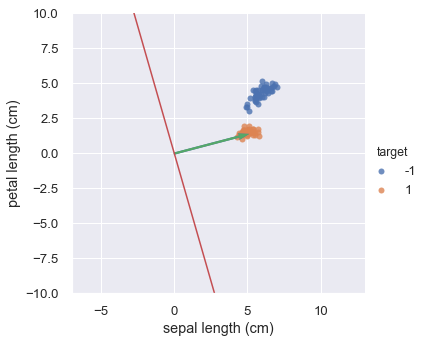

iterator: 1
x: [1.  7.  4.7]
w: [ 0.  -1.9 -3.3]


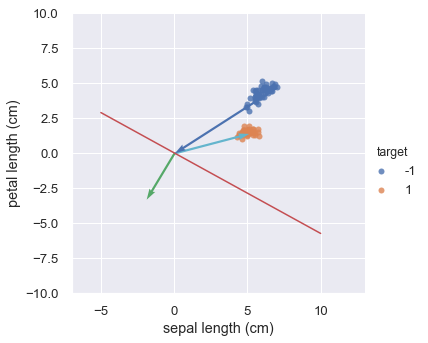

iterator: 2
x: [1.  5.1 1.4]
w: [ 1.   3.2 -1.9]


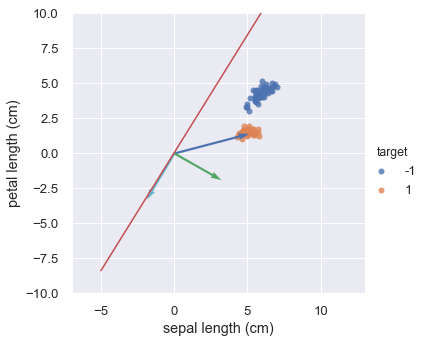

iterator: 3
x: [1.  7.  4.7]
w: [ 0.  -3.8 -6.6]


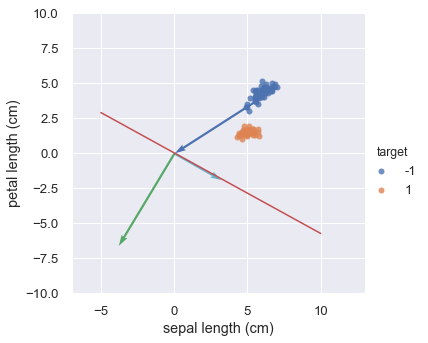

iterator: 4
x: [1.  5.1 1.4]
w: [ 1.   1.3 -5.2]


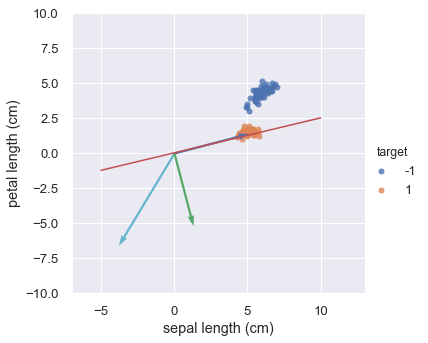

iterator: 5
x: [1.  4.6 1.5]
w: [ 2.   5.9 -3.7]


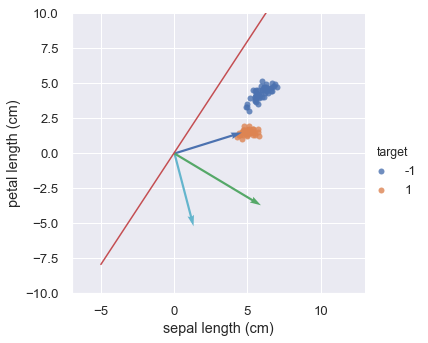

iterator: 6
x: [1.  7.  4.7]
w: [ 1.  -1.1 -8.4]


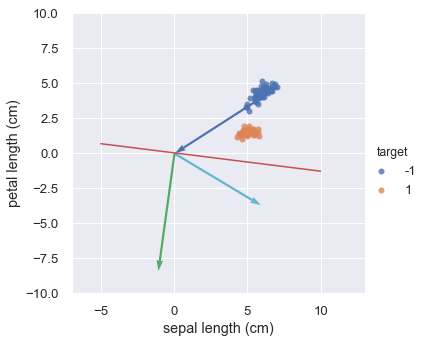

iterator: 7
x: [1.  5.1 1.4]
w: [ 2.  4. -7.]


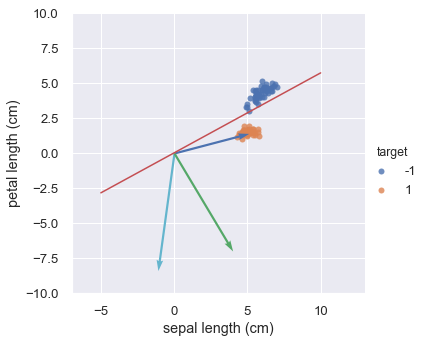

iterator: 8
x: [1.  5.7 3.5]
w: [  1.   -1.7 -10.5]


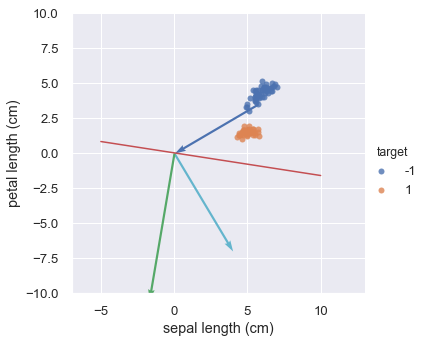

iterator: 9
x: [1.  5.1 1.4]
w: [ 2.   3.4 -9.1]


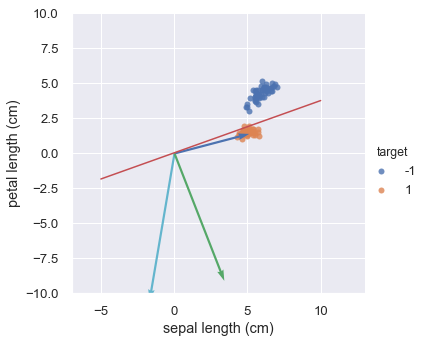

In [54]:
# Do PLA
w = np.array([0., 0., 0.])
error = 1
iterator = 0
while error != 0:
    error = 0
    for i in range(len(data)):
        # Set vector x_t and scalar y
        x = np.concatenate((np.array([1.]), np.array(data.iloc[i,:2])))   # np.concatenate((a,b))
        y = np.array(data.iloc[i,2])
        
        # Check equation in PLA Algo. Step 1
        if sign(np.dot(w,x)) != y:
            print("iterator: " + str(iterator))
            iterator += 1
            error += 1
            sns.lmplot('sepal length (cm)','petal length (cm)',data=data, fit_reg=False, hue='target')
            
            # Normal vector of prevoius decision boundary, vector w_t-1(Cyan arrow)
            plt.quiver([0], [0], [w[1]] ,[w[2]], angles='xy', scale_units='xy', scale=1, color='c')
            
            # Update w vector when prediction is wrong (PLA Algo. Step 2) *Green = Blue + Cyan
            w += y*x            
            
            # Plot vector x_t(Blue arrow)
            if y < 0:
                plt.quiver([x[1]], [x[2]], [-x[1]] ,[-x[2]], angles='xy', scale_units='xy', scale=1, color='b')
            elif y > 0:
                plt.quiver([0], [0], [x[1]] ,[x[2]], angles='xy', scale_units='xy', scale=1, color='b')
            
            # Direction vector of decision boundary (line equation: y = (-w[1]/w[2])*x)
            x_decision_boundary = np.linspace(-5,10)
            y_decision_boundary = (-w[1]/w[2])*x_decision_boundary
            plt.plot(x_decision_boundary, y_decision_boundary,'r')
            
            # Normal vector of decision boundary, vector w_t(Green arrow)
            plt.quiver([0], [0], [w[1]] ,[w[2]], angles='xy', scale_units='xy', scale=1, color='g')
            
            # Figure description
            plt.xlim(-7,13)
            plt.ylim(-10,10)
            
            # Plot during every iterations
            print("x: " + str(x))            
            print("w: " + str(w))
            plt.show()

<img src="img/Logistic Regression Network.jpg" width="900">  
### 邏輯回歸 (Logistic Regression)
邏輯回歸假設數據服從**伯努利分佈**，通過**最大概似法**的方法得到損失函數**交叉熵**，並且運用**梯度下降**來求解參數，來達到將數據**二分類**的目的。[1]  

邏輯回歸基本假設是假設 $n$ 個數據服從**伯努利分佈**，假設 $\phi (z_{i})$ 為樣本 $i$ 為正的概率，$1-\phi (z_{i})$ 為樣本 $i$ 為負的概率。那麼整個模型可以描述為：[2]

$$ p_{i} = \phi \left ( z_{i} \right )=\frac{1}{1+e^{-z_{i}}}\:\:where\:\:z_{i}= \mathbf{w}^{T}\mathbf{x_{i}}\:\:for\:i=1,2,...,n \:\,  $$  

損失函數則使用**最大概似法(Maximum likelihood)**得到**交叉熵(Cross entropy)**：

$$ \underset{\mathbf{w}}{max}\: \prod_{i=1}^{n} \,(\phi (z_{i}))^{y_{i}}(1-\phi (z_{i}))^{1-y_{i}} $$  
$$ equivalence\:\: with\:\:\:\: min\:-log(\prod_{i=1}^{n} \,(\phi (z_{i}))^{y_{i}}(1-\phi (z_{i}))^{1-y_{i}})=-\sum_{i=1}^{n}(y_{i}log(\phi (z_{i})+(1-y_{i})log(1-\phi (z_{i})) $$

由於該最大概似法函數無法直接求解，我們一般通過對該函數進行**梯度下降**來不斷逼近最優解，而梯度下降有隨機梯度下降(SGD)，批次梯度下降(BGD)，小批次梯度下降法(MBGD)三種方式：  
$$ \mathbf{w}_{t+1}\leftarrow \mathbf{w}_{t}+\alpha \frac{\partial \mathbf{L(\mathbf{w})}}{\partial \mathbf{w}}=\mathbf{w}_{t}+\alpha\sum_{i=1}^{n}(\phi (z_{i})-y_{i})\mathbf{x}_{i} $$  
* **隨機梯度下降(SGD)**  
  隨機梯度下降是以高方差頻繁更新，優點是有機會跳到新的和潛在更好的**局部最優解**，缺點是使得收斂到局部最優解的過程更加的複雜。  
  

* **批次梯度下降(BGD)**  
  可獲得**全局最優解**，缺點是在更新每個參數的時候需要遍歷所有的數據，**計算量會很大**，並且會有很多的冗餘計算，導致的結果是當數據量大的時候，每個參數的更新都會很慢。  
  

* **小批次梯度下降法(MBGD)**  
  小批次梯度下降結合了SGD和BGD的優點，每次更新的時候使用 $n$ 個樣本。減少了參數更新的次數，可以達到更加穩定收斂結果，一般在深度學習當中我們採用這種方法。

不過上述方法其實還有兩個致命的問題，第一個是如何對模型選擇合適的學習率。自始至終保持同樣的學習率其實不太合適。因為一開始參數剛剛開始學習的時候，此時的參數和最優解隔的比較遠，需要保持一個較大的學習率盡快逼近最優解。但是學習到後面的時候，參數和最優解已經隔的比較近了，保持最初的學習率容易越過最優點，並在最優點附近來回振盪。第二個是如何對參數選擇合適的學習率，在實踐中，對每個參數都保持的同樣的學習率也是很不合理，有些參數更新頻繁，那麼學習率可以適當小一點，而有些參數更新緩慢，那麼學習率就應該大一點。為了解決諸此問題，Adagrad、Adam等方法相繼被提出並採用。  

邏輯回歸的優缺點總結：  

* **優點**
    + 形式簡單，模型的可解釋性非常好。從特徵的權重可以看到不同的特徵對最後結果的影響，某個特徵的權重值比較高，那麼這個特徵最後對結果的影響會比較大。
    + 作為基礎模型是可以接受，如果特徵工程做的好，效果不會太差，並且特徵工程可以大家並行開發，大大加快開發的速度。
    + 訓練速度較快及資源佔用小，分類的時候，計算量僅僅只和特徵的數目相關。
    + 方便輸出結果調整。邏輯回歸可以很方便的得到最後的分類結果，因為輸出的是每個樣本的概率分數，我們可以很容易的對這些概率分數進行劃分閾值(大於某個閾值的是一類，小於某個閾值的是一類)。  
    
    
* **缺點**  
    + 準確率並不是很高，因為形式非常的簡單(廣義線性模型)，處理非線性數據會產生麻煩。在邏輯回歸在不引入其他方法的情況下，只能處理線性可分的數據，或者進一步說，處理二分類的問題。
    + 很難處理數據不平衡的問題。
    + 邏輯回歸本身無法篩選特徵。有時候，我們會用樹狀模型來篩選特徵，然後再上邏輯回歸。
    
#### **參考資料**   
   1. [逻辑回归的常见面试点总结](https://reurl.cc/3lRVX)
   2. [機器/統計學習: 羅吉斯回歸(Logistic regression)](https://reurl.cc/AeYyj)
   3. [Machine Learning學習日記 — Coursera篇 (Week 3.2):Cost Function, Simplified Cost Function and Gradient Descent, Advanced Optimization](https://reurl.cc/rjAZZ)
   4. [2 WAYS TO IMPLEMENT MULTINOMIAL LOGISTIC REGRESSION IN PYTHON](https://reurl.cc/ajA44)
   5. [Python examples of popular machine learning algorithms with interactive Jupyter demos and math being explained](https://reurl.cc/Yrp0D)

In [55]:
# Preprocessing
data = iris_df[(iris_df['target']==0) | (iris_df['target']==1)]
display(pd.concat([data.head(3), data.tail(3)], axis=0))

# Train test split (no validation set)
X_train, X_test, y_train, y_test = train_test_split(data[['sepal length (cm)','petal length (cm)']], data[['target']],
                                                    test_size=0.20, random_state=0)
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")

# Standardization
X_train = StandardScaler().fit_transform(X_train)
X_test = StandardScaler().fit_transform(X_test)

# Check standardization (standardized data has zero mean and unit variance for all features)
print(f"X_train mean: {X_train.mean(axis=0)}, variance: {X_train.std(axis=0)}")
print(f"X_test mean: {X_test.mean(axis=0)}, variance: {X_test.std(axis=0)}")

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_names
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
97,6.2,2.9,4.3,1.3,1,versicolor
98,5.1,2.5,3.0,1.1,1,versicolor
99,5.7,2.8,4.1,1.3,1,versicolor


Shape of X_train: (80, 2)
Shape of X_test: (20, 2)
Shape of y_train: (80, 1)
Shape of y_test: (20, 1)
X_train mean: [ 0. -0.], variance: [1. 1.]
X_test mean: [0. 0.], variance: [1. 1.]


In [56]:
# Do Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)

print('y_predict: ', y_pred)
print('y_test:    ', y_test['target'].values)

# Evaluate with accuracy since it is a classification problem
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy:   {acc:.2f}")

y_predict:  [0 1 0 1 1 1 0 1 1 1 1 1 1 0 0 0 0 0 0 0]
y_test:     [0 1 0 1 1 1 0 1 1 1 1 1 1 0 0 0 0 0 0 0]
Accuracy:   1.00


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


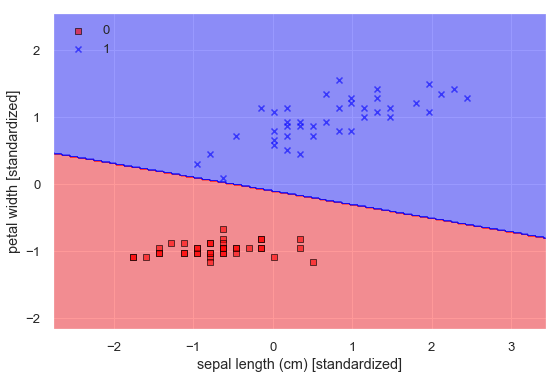

In [57]:
# Data Visualization
plot_decision_regions(X_train, y_train['target'], classifier=log_reg)
plt.xlabel('sepal length (cm) [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()

<img src="img/Support Vector Machine.jpg" width="600">  
### 支持向量機 (Support Vector Machine, SVM)

Satisfying following equation:
    $$
    \mathbf{arg}\:\underset{\mathbf{w}, \, b}{\mathbf{max}}\: margin
    $$
    $$
    \mathbf{s.t} \:\:\:\: y_{i}(\mathbf{w}^{T}\mathbf{x}_{i}+b)\geq margin,\:\forall i,\:\:where\:\:margin=\frac{2}{\left \| \mathbf{w} \right \|}
    $$

In [58]:
# Do SVC
svc = SVC(kernel='linear', probability=True)
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
print('y_predict: ', y_pred)
print('y_test:    ', y_test['target'].values)

# Evaluate with accuracy since it is a classification problem
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy:   {acc:.2f}")

y_predict:  [0 1 0 1 1 1 0 1 1 1 1 1 1 0 0 0 0 0 0 0]
y_test:     [0 1 0 1 1 1 0 1 1 1 1 1 1 0 0 0 0 0 0 0]
Accuracy:   1.00


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


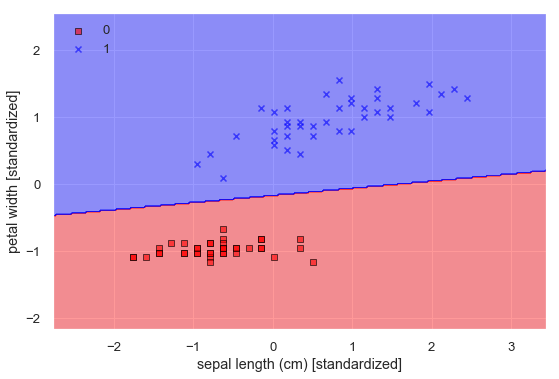

In [59]:
plot_decision_regions(X_train, y_train['target'], classifier=svc)
plt.xlabel('sepal length (cm) [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()

<img src="img/監督式機器學習模型_樹狀模型.png" width="800">   
### 樹狀模型

### 決策樹 (Decision Tree)
分類決策樹模型是一種描述對實例進行分類的樹形結構。決策樹由結點和有向邊組成。結點有兩種類型：內部節點和葉節點，內部節點表示一個特徵或屬性，葉節點表示一個類。分類的時候，從根節點開始，對實例的某一個特徵進行測試，根據測試結果，將實例分配到其子結點；此時，每一個子結點對應著該特徵的一個取值。如此遞歸向下移動，直至達到葉結點，最後將實例分配到葉結點的類中。[1]
* **根節點(Root Node)**  
  包含數據集中的所有數據的集合。  
  
  
* **內部節點(Decision Node)**  
  每個內部節點為一個判斷條件，並且包含數據集中滿足從根節點到該節點所有條件的數據的集合。根據內部結點的判斷條件測試結果，內部節點對應的數據的集合別分到兩個或多個子節點中。  
  
  
* **葉節點(Leaf Node)**  
  葉節點為最終的類別，被包含在該葉節點的數據屬於該類別。  
<img src="img/決策樹結構.png" width="800">  

決策樹學習算法包含特徵選擇、決策樹的生成與剪枝過程。決策樹的學習算法通常是遞歸地選擇最優特徵，並用最優特徵對數據集進行分割。開始時，構建根結點，選擇最優特徵，該特徵有幾種值就分割為幾個子集，每個子集分別遞歸調用此方法，返回結點，返回的結點就是上一層的子結點，最後直到所有特徵都已經用完，或者數據集只有一維特徵為止。一般的原則是，希望通過不斷劃分節點，使得一個分支節點包含的數據盡可能的屬於同一個類別，即**純度**越來越高。  

特徵選擇問題希望選取對訓練數據具有良好分類能力的特徵，這樣可以提高決策樹學習的效率。如果利用一個特徵進行分類的結果與隨機分類的結果沒有很大差別，則稱這個特徵是沒有分類能力的，為了解決特徵選擇問題，找出最優特徵，先要介紹一些信息論裡面的概念。[2]

定義一個節點的純度，將其稱之為**信息熵(Entropy)**：
$$ Entropy(D)=-\sum_{i=1}^{n}p_{i}log_{2}(p_{i}) $$

其中 $p_{i}$ 代表當前節點 $D$ 的數據中第 $i$ 類樣本所佔的比例，可以注意到信息熵在 $p_{i}=1$ 時有最小值 $0$ ，代表資料亂度很低，信息量很純。  

假設選取屬性 $A$ 有 $V$ 個取值，按照決策樹的規則，$D$ 將被劃分為 $V$ 個不同的節點數據集，$D^{v}$ 代表其中第 $v$ 個節點，則 $A$ 對 $D$ 劃分的期望信息為：
$$ Entropy(D,A)=\sum_{v=1}^{V}\frac{\left | D^{v} \right |}{\left | D \right |}Entropy(D^{v}) $$
且定義**信息增益(Information Gain)**就是兩者的差值：
$$ IG(D,A) = Entropy(D)- Entropy(D,A) = Entropy(D)-\sum_{v=1}^{V}\frac{\left | D^{v} \right |}{\left | D \right |}Entropy(D^{v}) $$

$\frac{\left | D^{v} \right |}{\left | D \right |}$ 表示分支節點所佔的比例大小，顯然數據集越大的分支節點權重越高，以及，分支節點整體純度越大，則後一項越小，信息增益Gain變得越大，所以我們的目標是如何最大化信息增益，由此，我們得到了一種選擇劃分屬性的方法，計算以每個屬性進行劃分子節點得到的信息增益，選擇其中最大的作為選擇的屬性。而以上則是決策樹的ID3算法，但ID3有一些缺陷，就是信息增益原則對於每個分支節點，都會乘以其權重，也就是說，由於權重之和為 $1$ ，所以分支節點分的越多，即每個節點數據越小，純度可能越高。這樣會導致信息熵準則偏愛那些取值數目較多的屬性。

為了解決該問題，C4.5算法引入了**信息增益率(Gain Ratio)**，定義如下：
$$  Split\_info(D,A) = \sum_{v=1}^{V}\frac{\left | D^{v} \right |}{\left | D \right |}log_{2}(\frac{\left | D^{v} \right |}{\left | D \right |}) $$
$$ Gain\_ratio(D,A) = \frac{IG(D,A)}{Split\_info(D,A)} $$  
C4.5就是選擇最大增益率的屬性來分裂，其他類似ID3.5。

而C5.0 演算法是 C4.5的商業改進版，可應用於海量資料集合上之分類。主要在執行準確度和記憶體耗用方面做了改進。因其採用Boosting方式來提高模型準確率，且佔用系統資源與記憶體較少，所以計算速度較快。其所使用的演算法沒有被公開。[3]  

CART(Classification and Regression Tree)與ID3、C4.5、C5.0演算法的最大相異之處是，其在每一個節點上都是採用二分法，也就是一次只能夠有兩個子節點，ID3、C4.5、C5.0則在每一個節點上可以產生不同數量的分枝，並且以**吉尼係數(Gini index)**做為選擇屬性的依據：
$$ Gini(D)=1-\sum_{i=1}^{n}p_{i}^{2} $$
$$ Gini\_index(D,A)=\sum_{v=1}^{V}\frac{\left | D^{v} \right |}{\left | D \right |}Gini(D^{v}) $$  
可以看出基尼指數越小，說明純度越高，我們可以通過選擇基尼指數小的屬性來劃分子節點。
#### **參考資料**   
   1. [【机器学习】决策树（上）——从原理到算法实现](https://reurl.cc/9NaXn)
   2. [决策树详解](https://reurl.cc/vOA1j)
   3. [AI - Ch14 機器學習(2), 決策樹 Decision Tree](https://reurl.cc/El97v)
   4. [HOW DECISION TREE ALGORITHM WORKS](https://reurl.cc/elNxb)


In [60]:
# Preprocessing
display(pd.concat([iris_df.head(), iris_df.tail()], axis=0))

# Train test split (no validation set)
X_train, X_test, y_train, y_test = train_test_split(iris_df[['sepal length (cm)','petal length (cm)']], iris_df[['target']],
                                                    test_size=0.20, random_state=0)
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")

# It's not necessary to do normalization in tree-based model 

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_names
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica
149,5.9,3.0,5.1,1.8,2,virginica


Shape of X_train: (120, 2)
Shape of X_test: (30, 2)
Shape of y_train: (120, 1)
Shape of y_test: (30, 1)


In [61]:
# Do Decision Tree Classifier
# Choose entropy method and set max depth to 5
dct_clf = DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=0)    
dct_clf.fit(X_train, y_train)
y_pred = dct_clf.predict(X_test)
print('y_predict: ', y_pred)
print('y_test:    ', y_test['target'].values)

# Evaluate with accuracy since it is a classification problem
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy:   {acc:.2f}")

y_predict:  [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0]
y_test:     [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0]
Accuracy:   1.00


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


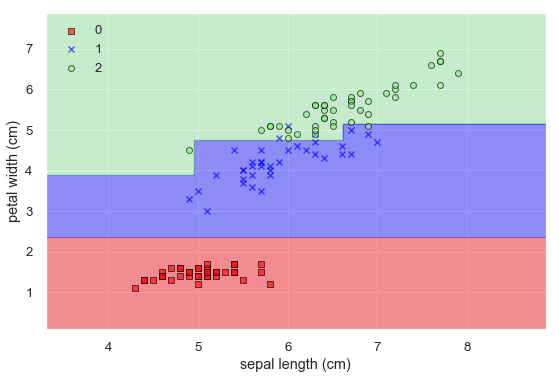

In [62]:
# Data Visualization
plot_decision_regions(X_train.values, y_train['target'].values, classifier=dct_clf)
plt.xlabel('sepal length (cm)')
plt.ylabel('petal width (cm)')
plt.legend(loc='upper left')
plt.tight_layout()

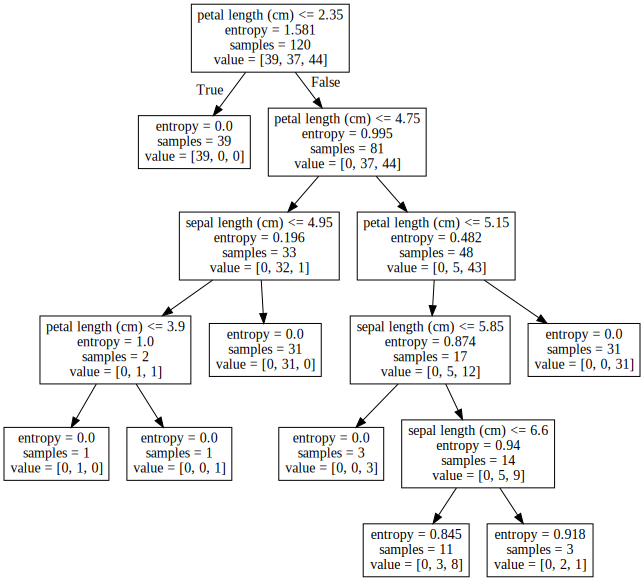

In [63]:
from graphviz import Source
from sklearn.tree import export_graphviz
from IPython.display import SVG

graph = Source(export_graphviz(dct_clf, out_file=None, feature_names=['sepal length (cm)','petal length (cm)']))
SVG(graph.pipe(format='svg'))

**<font color=black size=5>Random Forest</font>**

In [64]:
# Do Random Forest Classifier
# Choose gini method and constraint the number of trees at 10 and use 2 cores for parallel computing
rf_clf = RandomForestClassifier(criterion='gini', n_estimators=10, random_state=10, max_depth=5, n_jobs=2)
rf_clf.fit(X_train, y_train['target'])
y_pred = rf_clf.predict(X_test)
print('y_predict: ', y_pred)
print('y_test:    ', y_test['target'].values)

# Evaluate with accuracy since it is a classification problem
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy:   {acc:.2f}")

y_predict:  [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 1 0 0 1 1 0]
y_test:     [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0]
Accuracy:   0.97


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


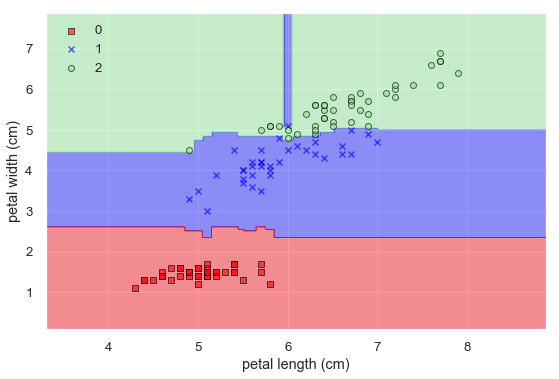

In [65]:
# Data Visualization
plot_decision_regions(X_train.values, y_train['target'].values, classifier=rf_clf)
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')
plt.legend(loc='upper left')
plt.tight_layout()

**<font color=black size=5>XGBoost</font>**

In [66]:
iris = datasets.load_iris()
x = pd.DataFrame(iris['data'], columns=iris['feature_names'])
y = pd.DataFrame(iris['target'], columns=['target'])
iris_df = pd.concat([x,y], axis=1)
iris_df.tail(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2
149,5.9,3.0,5.1,1.8,2


**<font color=black size=4>Split Train/ Validation/ Test Set</font>**

In [67]:
from sklearn.model_selection import train_test_split

# Train test split (no validation set)
X_train, X_test, y_train, y_test = train_test_split(iris_df[['petal width (cm)','petal length (cm)']], 
                                                    iris_df[['target']], test_size=0.20, random_state=50)
print(X_train.shape)
print(X_test.shape)

(120, 2)
(30, 2)


**<font color=black size=4>Standardization</font>**

In [68]:
from sklearn import preprocessing

X_train_stdscaled = preprocessing.scale(X_train)
X_test_stdscaled = preprocessing.scale(X_test)

# Check standardization 
# ------------------------------------------------------------------
# Suppress scientific notation
np.set_printoptions(suppress=True)

# Standardized data has zero mean and unit variance for all features
print('X_train mean:', X_test_stdscaled.mean(axis=0))
print('X_train variance:', X_test_stdscaled.std(axis=0))
print('X_test mean:', X_test_stdscaled.mean(axis=0))
print('X_test variance:', X_test_stdscaled.std(axis=0))
# ------------------------------------------------------------------

X_train mean: [0. 0.]
X_train variance: [1. 1.]
X_test mean: [0. 0.]
X_test variance: [1. 1.]


**<font color=black size=4>Do XGBoost</font>**

In [69]:
# Note that XGBoost will make some troubles if the input is not numpy arrary
from xgboost import XGBClassifier

xgb = XGBClassifier()
xgb.fit(X_train_stdscaled, y_train.values.ravel())
y_predict = xgb.predict(X_test_stdscaled)
print('y_predict: ', y_predict)
print('y_test:    ', y_test['target'].values)

y_predict:  [1 1 0 0 2 2 2 0 0 1 0 2 0 2 1 0 1 0 1 1 2 1 0 2 1 2 1 1 1 2]
y_test:     [1 1 0 0 2 2 2 0 0 1 0 2 0 2 1 0 1 0 1 1 2 1 0 2 1 2 1 1 1 2]


In [70]:
# Calculate accuracy of prediction
xgb.score(X_test_stdscaled, y_test)

1.0

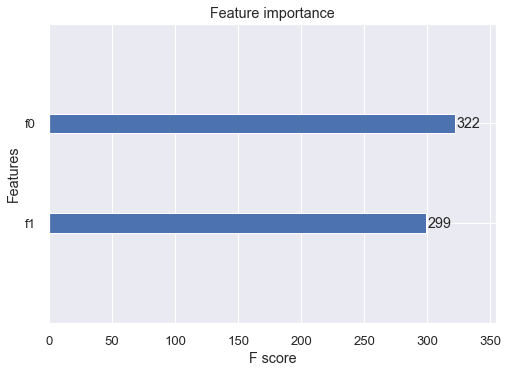

In [71]:
from xgboost import plot_importance
plot_importance(xgb)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


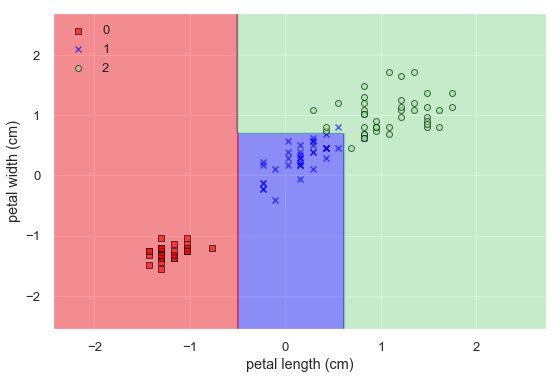

In [72]:
plot_decision_regions(X_train_stdscaled, y_train['target'].values, classifier=xgb)
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')
plt.legend(loc='upper left')
plt.tight_layout()